# Predicting the Used Cars Pricing using Machine Learning

In this notebook, I am going to go through an example machine learning project with the goal of predicting the sale price of set used cars.

1. Problem definition
How well can we predict the price of a used cars, given its characteristics and categories provided by Kaggle.


2. Data
The data was adapted from that of Used Cars Dataset , which was constructed by scraping data on car sales from Craigslist.org every few months. https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

There is 1 dataset:

* vehicles.csv

3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted prices.

For more on the evaluation of this project check: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

4. Features 

* id - a unique identifier for each row
* url - listing URL
* region - craigslist region
* region_url - region URL
* price - entry price
* year - year of vehicle
* manufacturer - manufacturer of vehicle
* model - model of vehicle
* condition - condition of vehicle
* cylinders - number of cylinders
* fuel - fuel type
* odometer - miles traveled by vehicle
* title_status - title status of vehicle
* transmission - transmission of vehicle
* VIN - vehicle identification number
* drive - type of drive
* size - size of vehicle
* type - generic type of vehicle
* paint_color - color of vehicle
* image_url - image URL
* description - listed description of vehicle
* state - state of listing
* lat - latitude of listing
* long - longitude of listing
* posting_date - date of posting the listing

# Importing the data and preparing it for modeling

In [7]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Import the training and validation set
df = pd.read_csv("vehicles.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


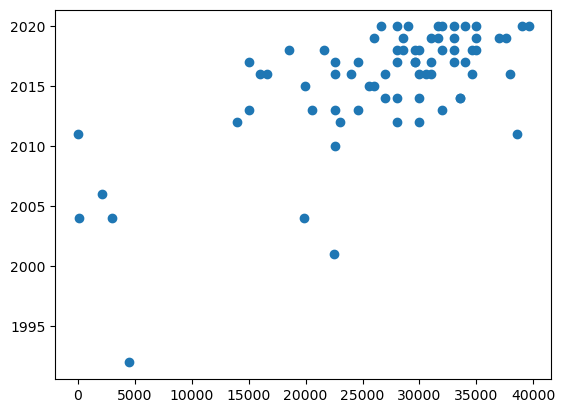

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["price"][:100], df["year"][:100])

<Axes: ylabel='Frequency'>

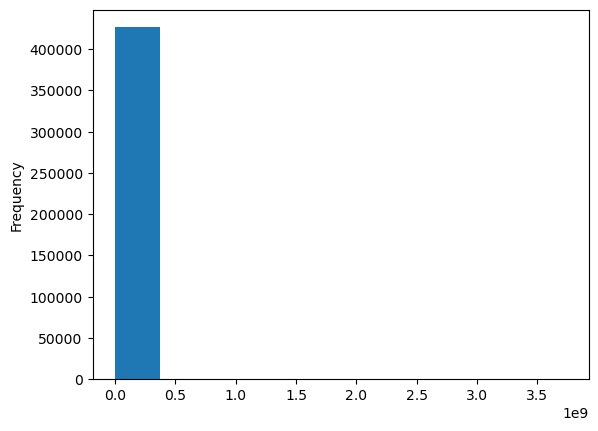

In [12]:
df.price.plot.hist()

In [13]:
df.corr(numeric_only=True)

,id,price,year,odometer,county,lat,long
id,1.000000,-0.002779,-0.059040,0.010721,NaN,-0.069388,-0.121864
price,-0.002779,1.000000,-0.004925,0.010032,NaN,0.000357,-0.000408
year,-0.059040,-0.004925,1.000000,-0.157215,NaN,-0.014677,-0.001410
odometer,0.010721,0.010032,-0.157215,1.000000,NaN,-0.001459,0.009807
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.069388,0.000357,-0.014677,-0.001459,NaN,1.000000,-0.128088
long,-0.121864,-0.000408,-0.001410,0.009807,NaN,-0.128088,1.000000


In [14]:
df.price.head(30)

0      6000
1     11900
2     21000
3      1500
4      4900
5      1600
6      1000
7     15995
8      5000
9      3000
10        0
11        0
12        0
13        0
14        0
15    13995
16    24999
17    21850
18    26850
19    11999
20    24999
21    21850
22    26850
23    11999
24    24999
25    21850
26      500
27    33590
28    22590
29    39590
Name: price, dtype: int64

## Make a copy of the original DataFrame
Since I am going to be manipulating the data, I'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [15]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [16]:
# Check the different values of different columns
df_tmp.manufacturer.value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


## 5. Modelling

Knowing the evaluation metric I am heading towards. I could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what I'll do instead is use a machine learning model to help me do EDA.

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map, we find a https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor might be a good candidate.

In [17]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [18]:
# Check for missing values
df_tmp.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

## Convert strings to categories
One way to help turn all of the data into numbers is to convert the columns with the string datatype into a category datatype.

To do this I can use the pandas types API which allows me to interact and manipulate the types of data.

In [19]:
df_tmp.tail().T

,426875,426876,426877,426878,426879
id,7301591192,7301591187,7301591147,7301591140,7301591129
url,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...
region,wyoming,wyoming,wyoming,wyoming,wyoming
region_url,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,23590,30590,34990,28990,30590
year,2019.0,2020.0,2020.0,2018.0,2019.0
manufacturer,nissan,volvo,cadillac,lexus,bmw
model,maxima s sedan 4d,s60 t5 momentum sedan 4d,xt4 sport suv 4d,es 350 sedan 4d,4 series 430i gran coupe
condition,good,good,good,good,good
cylinders,6 cylinders,NaN,NaN,6 cylinders,NaN


In [20]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

url
region
region_url
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
size
type
paint_color
image_url
description
state
posting_date


In [21]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  category
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  category
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [23]:
df_tmp.region.cat.categories

Index(['SF bay area', 'abilene', 'akron / canton', 'albany', 'albuquerque',
       'altoona-johnstown', 'amarillo', 'ames', 'anchorage / mat-su',
       'ann arbor',
       ...
       'winchester', 'winston-salem', 'worcester / central MA', 'wyoming',
       'yakima', 'york', 'youngstown', 'yuba-sutter', 'yuma',
       'zanesville / cambridge'],
      dtype='object', length=404)

In [24]:
df_tmp.fuel.cat.categories

Index(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype='object')

In [25]:
df_tmp.model.cat.categories

Index(['"t"',
       '$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles',
       '%', '& altima', ''50 Business Coupe', ''99 H1 Hummer', '(210)',
       '(300)', '(cng) 2500 express van', '(s)port (s)edan',
       ...
       'zl1 camaro', 'zr2 sonoma', 'zx2', 'Х5М', '​​sorento lx',
       '♦ALL TADES WELCOME!♦', '♿', '♿ vmi', '𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350',
       '🔥GMC Sierra 1500 SLE🔥 4X4 🔥'],
      dtype='object', length=29667)

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  category
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  category
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [27]:
df_tmp.state.cat.categories

Index(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi',
       'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh',
       'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa',
       'wi', 'wv', 'wy'],
      dtype='object')

In [28]:
df_tmp.state.cat.codes

0          3
1          2
2          9
3         19
4         27
          ..
426875    50
426876    50
426877    50
426878    50
426879    50
Length: 426880, dtype: int8

In [29]:
df_tmp.isnull().sum()/len(df_tmp)

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [30]:
# Save preprocessed data
df_tmp.to_csv("used_car_price_train_tmp.csv",
              index=False)

In [32]:
# Import preprocessed data
df_tmp = pd.read_csv("used_car_price_train_tmp.csv",
                     low_memory=False)
df_tmp.tail().T

,426875,426876,426877,426878,426879
id,7301591192,7301591187,7301591147,7301591140,7301591129
url,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...
region,wyoming,wyoming,wyoming,wyoming,wyoming
region_url,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,23590,30590,34990,28990,30590
year,2019.0,2020.0,2020.0,2018.0,2019.0
manufacturer,nissan,volvo,cadillac,lexus,bmw
model,maxima s sedan 4d,s60 t5 momentum sedan 4d,xt4 sport suv 4d,es 350 sedan 4d,4 series 430i gran coupe
condition,good,good,good,good,good
cylinders,6 cylinders,NaN,NaN,6 cylinders,NaN


## The processed DataFrame has the columns I added to it but it's still missing values.

In [33]:
# Check missing values
df_tmp.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

## Fill missing values
Knowing two things:

1. All of the data has to be numerical
2. There can't be any missing values

And as I've seen using df_tmp.isna().sum() the data still has plenty of missing values.

Let's fill them.

## Filling numerical values first
Going to fill any column with missing values with the median of that column.

In [34]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

id
price
year
odometer
county
lat
long


In [35]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

year
odometer
county
lat
long


In [36]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

Adding a binary column indicating whether the data was missing.

Filling all of the missing numeric values in the dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [37]:
# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

county


In [38]:
# Check to see how many examples were missing
df_tmp.county_is_missing.value_counts()

True    426880
Name: county_is_missing, dtype: int64

In [39]:
df_tmp.year_is_missing.value_counts()

False    425675
True       1205
Name: year_is_missing, dtype: int64

## There is nothing in column of "county" will remove that entirely.

In [40]:
# Removing "county" column from data
df_tmp = df.drop("county", axis=1)

In [41]:
df_tmp.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [42]:
# Check again if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

year
odometer
lat
long


In [43]:
print(df_tmp.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')


## Filling and turning categorical variables to numbers
Now I've filled the numeric values, I'll do the same with the categorical values at the same time as turning them into numbers.

In [44]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


url
region
region_url
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
size
type
paint_color
image_url
description
state
posting_date


In [45]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1        

In [46]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       426880 non-null  int64  
 1   url                      426880 non-null  int32  
 2   region                   426880 non-null  int16  
 3   region_url               426880 non-null  int16  
 4   price                    426880 non-null  int64  
 5   year                     425675 non-null  float64
 6   manufacturer             426880 non-null  int8   
 7   model                    426880 non-null  int16  
 8   condition                426880 non-null  int8   
 9   cylinders                426880 non-null  int8   
 10  fuel                     426880 non-null  int8   
 11  odometer                 422480 non-null  float64
 12  title_status             426880 non-null  int8   
 13  transmission             426880 non-null  int8   
 14  VIN 

In [47]:
df_tmp.isna().sum()

id                            0
url                           0
region                        0
region_url                    0
price                         0
year                       1205
manufacturer                  0
model                         0
condition                     0
cylinders                     0
fuel                          0
odometer                   4400
title_status                  0
transmission                  0
VIN                           0
drive                         0
size                          0
type                          0
paint_color                   0
image_url                     0
description                   0
state                         0
lat                        6549
long                       6549
posting_date                  0
url_is_missing                0
region_is_missing             0
region_url_is_missing         0
manufacturer_is_missing       0
model_is_missing              0
condition_is_missing          0
cylinder

## Will fill missing value with medians and means. 
For lat and long it would be a little complicated, but with what is given in this dataset I would use the mean for this model

In [48]:
# Fill missing values in the 'year' column with the median value
df_tmp['year'].fillna(df_tmp['year'].median(), inplace=True)

# Fill missing values in the 'odometer' column with the mean value
df_tmp['odometer'].fillna(df_tmp['odometer'].mean(), inplace=True)

# Fill missing values in the 'lat' and 'long' columns with the mean values
df_tmp['lat'].fillna(df_tmp['lat'].mean(), inplace=True)
df_tmp['long'].fillna(df_tmp['long'].mean(), inplace=True)


In [49]:
df_tmp.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
year                       0
manufacturer               0
model                      0
condition                  0
cylinders                  0
fuel                       0
odometer                   0
title_status               0
transmission               0
VIN                        0
drive                      0
size                       0
type                       0
paint_color                0
image_url                  0
description                0
state                      0
lat                        0
long                       0
posting_date               0
url_is_missing             0
region_is_missing          0
region_url_is_missing      0
manufacturer_is_missing    0
model_is_missing           0
condition_is_missing       0
cylinders_is_missing       0
fuel_is_missing            0
title_status_is_missing    0
transmission_i

Now all of hte data is numeric and there are no missing values, I should be able to build a machine learning model.

Let's reinstantiate the trusty RandomForestRegressor.

This will take a few minutes which is too long for interacting with it. So what I'll do is create a subset of rows to work with.

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("price", axis=1), df_tmp.price)

CPU times: user 14min 8s, sys: 2.45 s, total: 14min 10s
Wall time: 1min 32s


RandomForestRegressor(n_jobs=-1)

In [57]:
# Score the model
model.score(df_tmp.drop("price", axis=1), df_tmp.price)


0.8314533737870261

## Splitting data into train/valid/test sets

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_tmp.drop("price", axis=1), df_tmp["price"], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the training, validation, and test sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)


X_train shape: (273203, 43)
X_valid shape: (68301, 43)
X_test shape: (85376, 43)


## Building an evaluation function

Will attempt to use root mean squared long error (RMSLE)

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric I am going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, I'll create our own.

Doing this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

I'll also calculate the MAE and R^2.

In [59]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)
Retraining an entire model would take far too long to continuing experimenting as fast as I want to.

So what I'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [60]:
# This takes too long...

# %%time
# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

In [61]:
len(X_train)

273203


### Let's alter the number of samples each n_estimator in the RandomForestRegressor see's using the max_samples parameter.

In [62]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)


Setting max_samples to 10000 making every n_estimator (default 100) in our RandomForestRegressor will only see 10000 random samples from the DataFrame instead of the entire 341504.

I'll be looking at 34x less samples which means we'll get faster computation speeds but I should expect our results to worsen as the model has less samples to learn patterns from).

In [63]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 22.7 s, sys: 198 ms, total: 22.9 s
Wall time: 2.68 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [64]:
show_scores(model)

{'Training MAE': 99474.89903599159,
 'Valid MAE': 79095.12230260171,
 'Training RMSLE': 2.7899195581818206,
 'Valid RMSLE': 2.832467732829215,
 'Training R^2': 0.09754805107771714,
 'Valid R^2': -0.2751489404614995}

## Hyperparameter tuning with RandomizedSearchCV
Will increase n_iter to try more combinations of hyperparameters but in our case, I'll try 20 and see where it gets me.

Trying to reduce the amount of time it takes between experiments.

In [65]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/heic/desktop/data_projects/used_car_price_regression/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/desktop/data_projects/used_car_price_regression/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/heic/desktop/data_projects/used_car_price_regression/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be re

CPU times: user 3min 6s, sys: 1.72 s, total: 3min 8s
Wall time: 3min 8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [67]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_


{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 3}

In [68]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 89614.56298685342,
 'Valid MAE': 63004.522002530895,
 'Training RMSLE': 3.433887739723532,
 'Valid RMSLE': 3.456478729117809,
 'Training R^2': 0.0003941519860416465,
 'Valid R^2': -0.0006578883654830836}

## Train a model with the best parameters
In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.


I'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [69]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=3,
                                    min_samples_split=12,
                                    max_features=1,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 16 s, sys: 154 ms, total: 16.2 s
Wall time: 1.92 s


RandomForestRegressor(max_features=1, min_samples_leaf=3, min_samples_split=12,
                      n_estimators=90, n_jobs=-1)

In [70]:
show_scores(ideal_model)

{'Training MAE': 84388.14397820046,
 'Valid MAE': 70114.97724327013,
 'Training RMSLE': 2.8766723215256995,
 'Valid RMSLE': 2.9463706647028762,
 'Training R^2': 0.26977534954603033,
 'Valid R^2': 0.023406392770047302}

With these new hyperparameters as well as using all the samples, I can see an improvement to our models performance.

Faster model by altering some of the hyperparameters, particularly by lowering n_estimators since each increase in n_estimators is basically building another small model.

However, lowering of n_estimators or altering of other hyperparameters may lead to poorer results.

In [71]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 1min 38s, sys: 286 ms, total: 1min 39s
Wall time: 11.5 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [72]:
show_scores(fast_model)

{'Training MAE': 76550.94362847843,
 'Valid MAE': 64133.80635824257,
 'Training RMSLE': 2.283628784653436,
 'Valid RMSLE': 2.4939602770091827,
 'Training R^2': 0.37512896796242456,
 'Valid R^2': -0.034871408022424166}

## Make predictions on test data
Now I've got a trained model, it's time to make predictions on the test data.


In [73]:
X_test.head()

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,transmission_is_missing,VIN_is_missing,drive_is_missing,size_is_missing,type_is_missing,paint_color_is_missing,image_url_is_missing,description_is_missing,state_is_missing,posting_date_is_missing
100905,7315883828,191911,182,186,2017.0,14,15259,3,6,3,...,False,False,False,True,False,False,False,False,False,False
143835,7314599643,305934,282,293,2006.0,8,11430,3,7,3,...,False,True,False,True,False,False,False,False,False,False
20235,7308399808,202450,195,199,2015.0,8,11430,0,7,3,...,False,True,False,True,False,True,False,False,False,False
300734,7312663807,413116,246,398,2013.0,5,2685,0,0,3,...,False,True,True,True,True,True,False,False,False,False
316249,7315368523,116757,101,108,2019.0,8,26076,0,7,5,...,False,False,True,True,True,False,False,False,False,False


In [74]:
X_train.head()

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,transmission_is_missing,VIN_is_missing,drive_is_missing,size_is_missing,type_is_missing,paint_color_is_missing,image_url_is_missing,description_is_missing,state_is_missing,posting_date_is_missing
298217,7315562964,94849,75,84,2007.0,17,11841,2,4,3,...,False,True,False,True,True,True,False,False,False,False
108574,7314551836,343474,309,323,2005.0,0,16,0,0,3,...,False,True,True,True,True,True,False,False,False,False
69187,7315850853,402604,378,387,2003.0,21,28594,1,6,3,...,False,True,False,False,False,False,False,False,False,False
168535,7305728413,385625,362,372,2019.0,17,10777,3,0,3,...,False,False,False,True,False,False,False,False,False,False
16825,7315744489,426469,403,412,2007.0,40,16020,3,6,3,...,False,True,False,False,False,False,False,False,False,False


In [75]:
# Let's see how the model goes predicting on the test data
model.predict(X_test)

array([31172.02, 10551.36, 36052.41, ..., 14629.39,  6309.9 , 33251.82])

In [76]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(X_test)

In [77]:
test_preds

array([30027.12811657, 17331.210824  , 28053.24961785, ...,
       11971.08697556, 10235.53112008, 23064.73714957])

In [78]:
len(test_preds)

85376

In [80]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["id"] = X_test["id"]
df_preds["price"] = test_preds
df_preds

,id,price
100905,7315883828,30027.128117
143835,7314599643,17331.210824
20235,7308399808,28053.249618
300734,7312663807,12591.592835
316249,7315368523,14953.130691
...,...,...
285104,7312059554,4758.473557
204282,7314862430,12882.048834
418859,7307868920,11971.086976
93858,7316839788,10235.531120


In [81]:
# Export prediction data
df_preds.to_csv("test_used_cars_predictions.csv", index=False)

# Find feature importance of our best model


In [82]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([8.92425660e-02, 5.61627246e-02, 2.54856728e-02, 2.40071884e-02,
       6.87064976e-02, 4.06009335e-02, 9.64100969e-02, 7.70596597e-03,
       4.05322568e-03, 5.45483076e-03, 7.84295276e-02, 1.22200082e-04,
       9.80346695e-03, 6.60373529e-03, 9.74440623e-03, 1.09388748e-02,
       1.26850000e-02, 8.24777908e-03, 5.27977230e-02, 6.21066694e-02,
       4.11829517e-02, 8.47016190e-02, 5.57304083e-02, 1.14376316e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39202349e-04,
       1.83157195e-03, 1.35538574e-03, 7.47033879e-03, 1.58036349e-05,
       1.77372869e-05, 7.53512530e-07, 1.35928317e-03, 8.11567736e-03,
       2.54642472e-03, 8.19540817e-03, 3.35165662e-03, 1.86000672e-08,
       2.29518701e-07, 0.00000000e+00, 1.29348939e-07])

In [83]:
!pip install seaborn

import seaborn as sns
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



# All requested packages already installed.



In [84]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

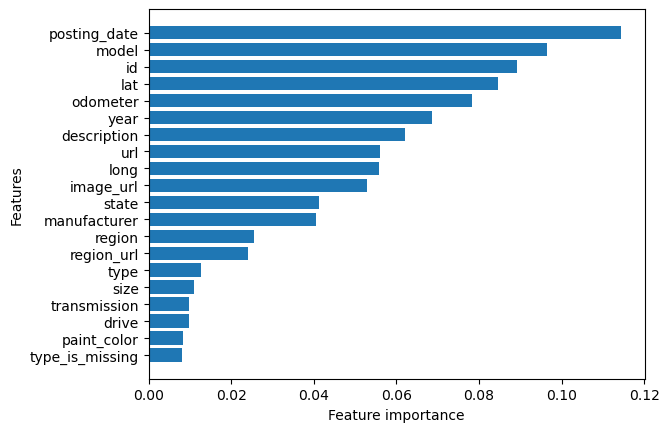

In [85]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [86]:
sum(ideal_model.feature_importances_)

0.9999999999999998

In [87]:
df.posting_date.isna().sum()

68

In [88]:
df.posting_date.value_counts()

2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400    11
2021-04-16T12:07:56-0500    10
2021-04-29T20:06:09-0500     9
                            ..
2021-04-05T12:01:13-0500     1
2021-04-05T13:57:52-0500     1
2021-04-05T14:28:08-0500     1
2021-04-05T14:33:37-0500     1
2021-04-04T03:21:07-0600     1
Name: posting_date, Length: 381536, dtype: int64

In [89]:
df.odometer.value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64